In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv("loan_approval_data.csv")

In [50]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [4]:
df['Applicant_Income'].max()

19988.0

In [5]:
df.shape

(1000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [7]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

# Handle Missing Values

In [8]:
categorical_col = df.select_dtypes(include='O').columns
numerical_col = df.select_dtypes(include='number').columns

In [9]:
from sklearn.impute import SimpleImputer

# Fill categorical columns with Simple Imputer(mode/ most_frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_col] = cat_imputer.fit_transform(df[categorical_col])

# Fill numerical columns with Simple Imputer(mean)
num_imputer = SimpleImputer(strategy='mean')
df[numerical_col] = num_imputer.fit_transform(df[numerical_col])

In [10]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA (Exploratory Data Analysis)

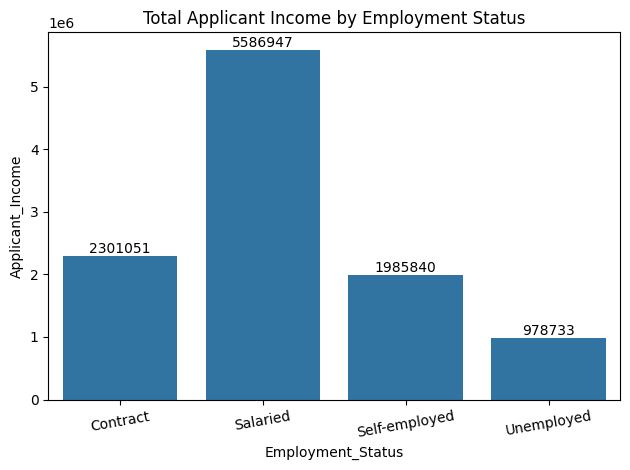

In [11]:
# Applicant Income By Employment Status
Income_by_status = df.groupby('Employment_Status')['Applicant_Income'].sum().reset_index()
ax = sns.barplot(data=Income_by_status,
           x='Employment_Status',
           y='Applicant_Income')

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.title("Total Applicant Income by Employment Status")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

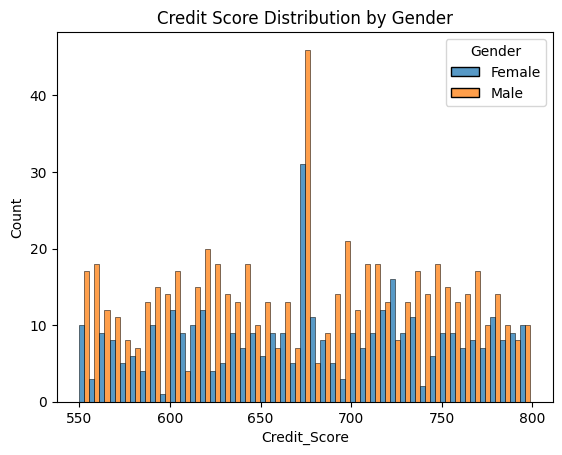

In [12]:
# Check Credit Score by Gender
sns.histplot(data=df,
            x='Credit_Score',
            hue='Gender',
            bins=45,
            multiple="dodge")

plt.title("Credit Score Distribution by Gender")
plt.show()

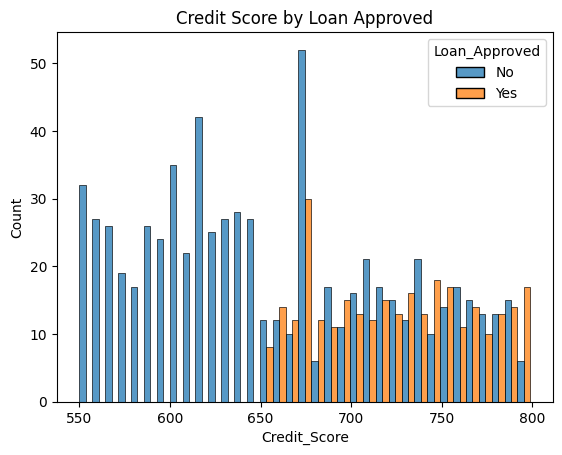

In [13]:
# Check Credit Score by Loan Approved
sns.histplot(data=df,
            x='Credit_Score',
            hue="Loan_Approved",
            bins=35,
            multiple="dodge")

plt.title("Credit Score by Loan Approved")
plt.show()

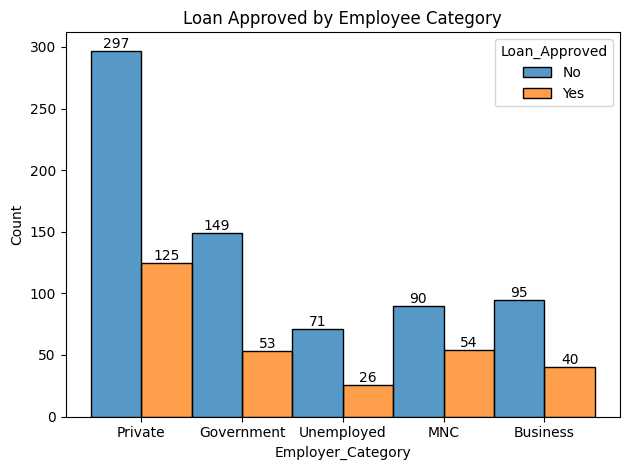

In [14]:
ax = sns.histplot(data=df,
           x='Employer_Category',
           hue='Loan_Approved',
            multiple="dodge")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
    
plt.title("Loan Approved by Employee Category")
plt.tight_layout()
plt.show()

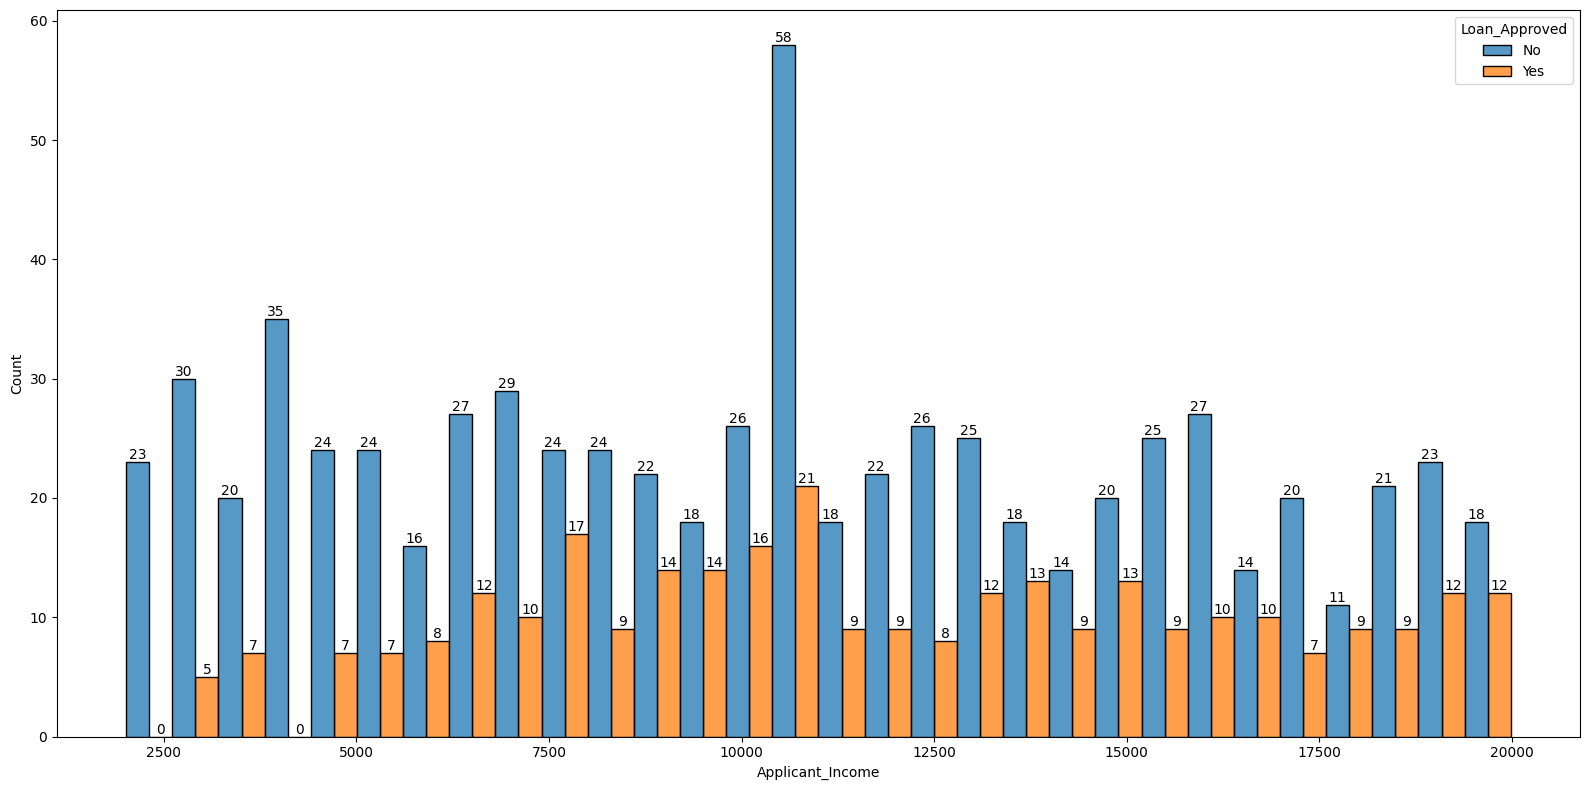

In [15]:
# Application Income by Loan Approved
plt.figure(figsize=(16,8))
ax = sns.histplot(data=df,
           x="Applicant_Income",
            hue="Loan_Approved",
            bins=30,
            multiple="dodge")

for label in ax.containers:
    ax.bar_label(label,fmt='%.0f')
    
plt.tight_layout()
plt.show()

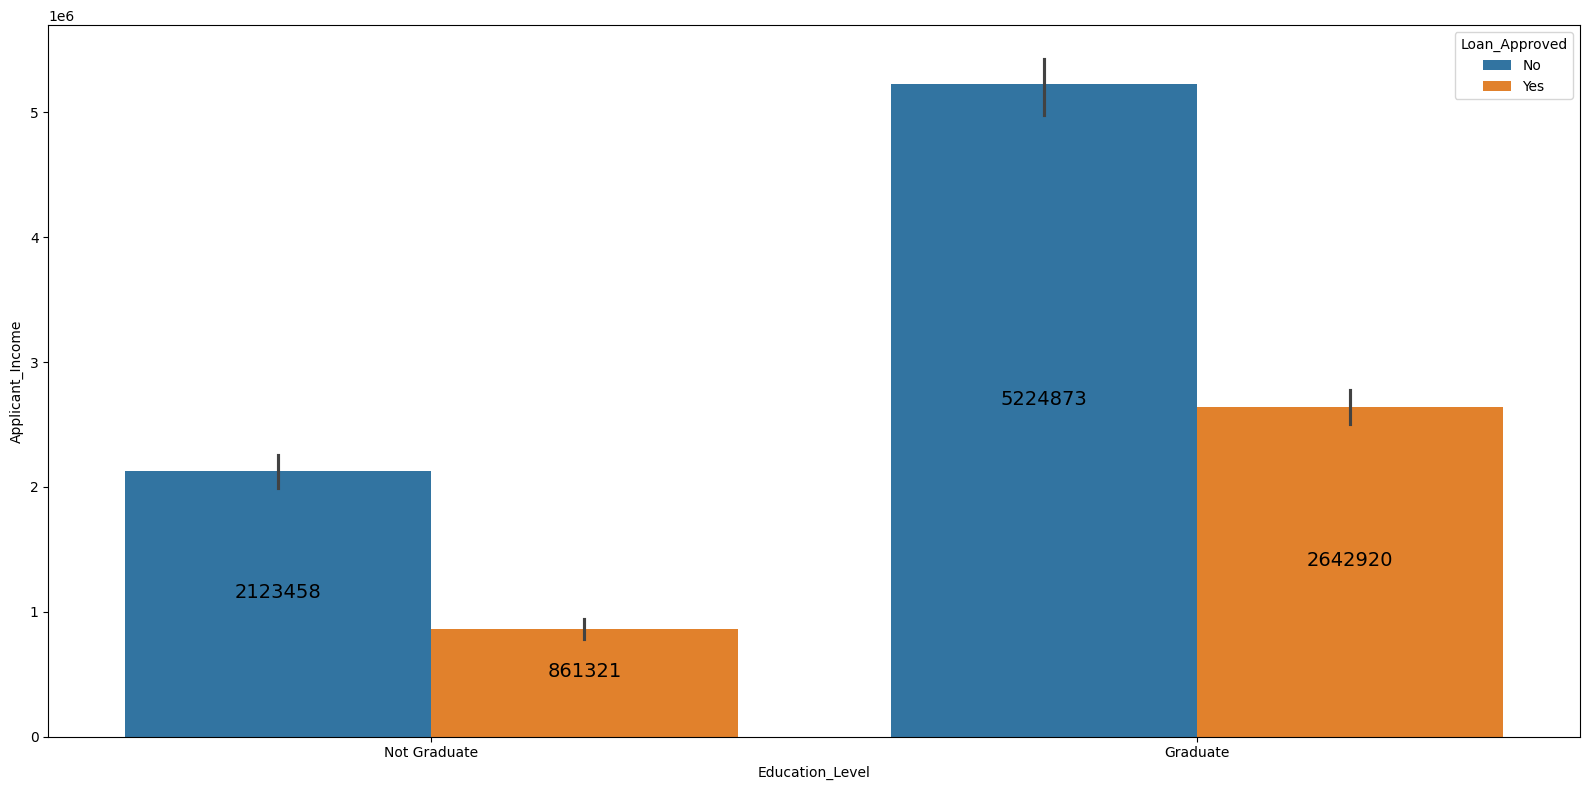

In [16]:
# Total Applicant Income by Education Level, Split by Loan Approval
plt.figure(figsize=(16,8))

ax = sns.barplot(data=df,
           x='Education_Level',
           y='Applicant_Income',
           hue='Loan_Approved',
                estimator=np.sum)

for label in ax.containers:
    ax.bar_label(label,fmt='%.0f',size=14,padding=8,label_type='center')

plt.tight_layout()
plt.show()

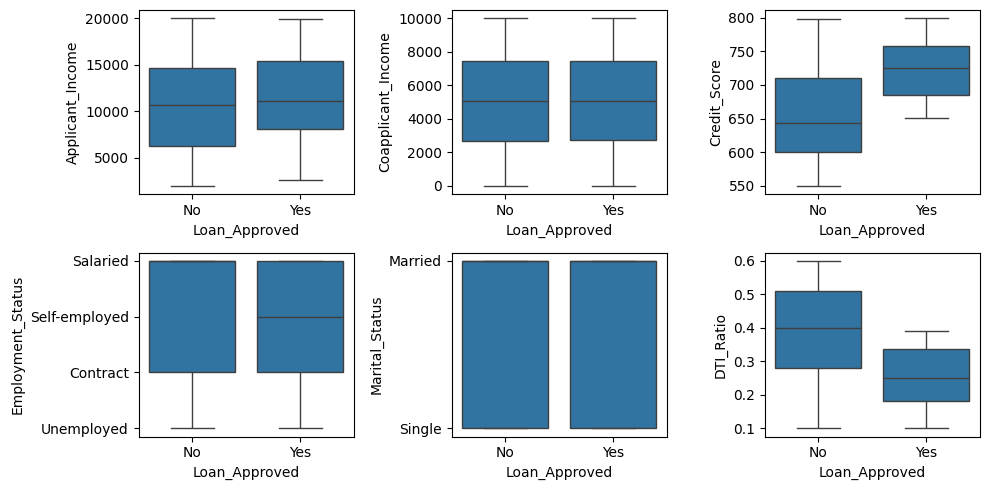

In [17]:
# Outlier Detection
fig, axes = plt.subplots(2,3, figsize=(10,5))

sns.boxplot(ax=axes[0,0],data=df, x="Loan_Approved", y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data=df, x="Loan_Approved", y="Coapplicant_Income")
sns.boxplot(ax=axes[0,2],data=df, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=df, x="Loan_Approved", y="Employment_Status")
sns.boxplot(ax=axes[1,1],data=df, x="Loan_Approved", y="Marital_Status")
sns.boxplot(ax=axes[1,2],data=df, x="Loan_Approved", y="DTI_Ratio")

plt.tight_layout()

In [18]:
df = df.drop(columns='Applicant_ID')

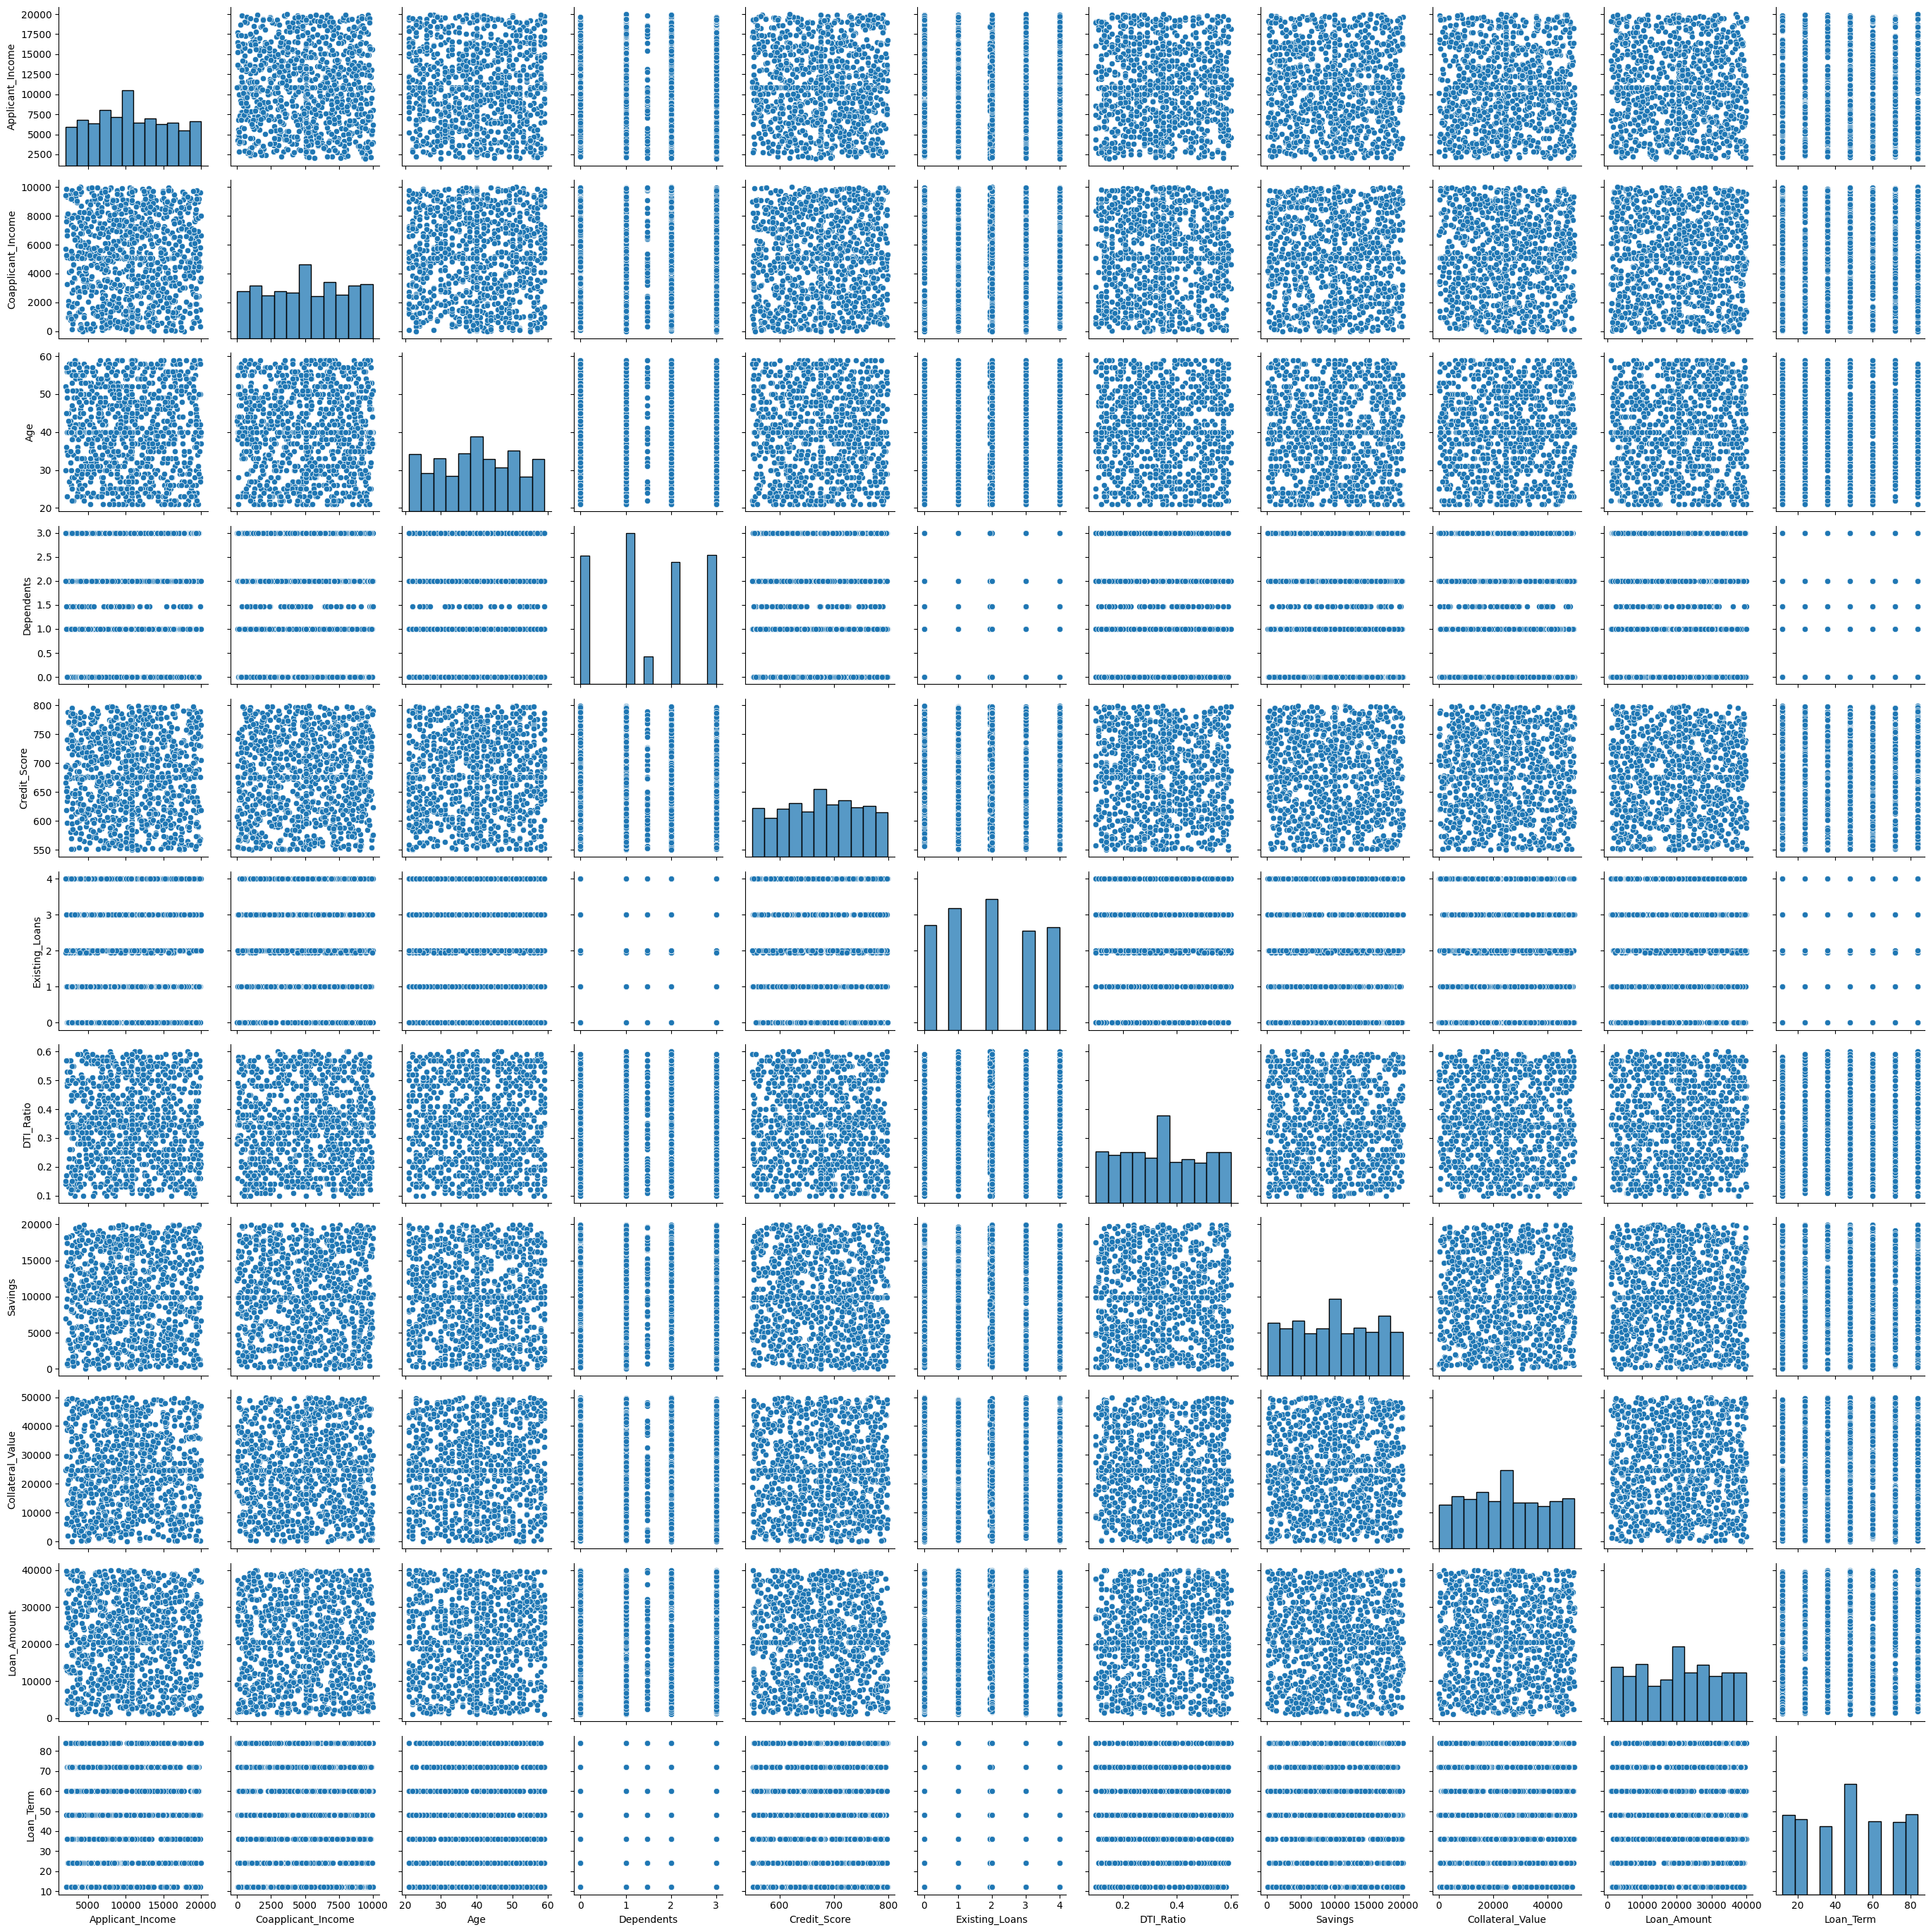

In [19]:
# Pair plot
sns.pairplot(data=df)
plt.tight_layout()
plt.show()

# Perform Encoding on Categorical Data

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Loan_Approved'] = le.fit_transform(df['Loan_Approved'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   int32  
 16  Gender 

In [22]:
cols = ['Employment_Status', 'Marital_Status','Loan_Purpose', 'Property_Area','Gender','Employer_Category']
ohe = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

encoded_cols = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(cols),index=df.index)

df_en = pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [23]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int32  
 12  Loan_Approved        

# Correlation HeatMap

<Axes: >

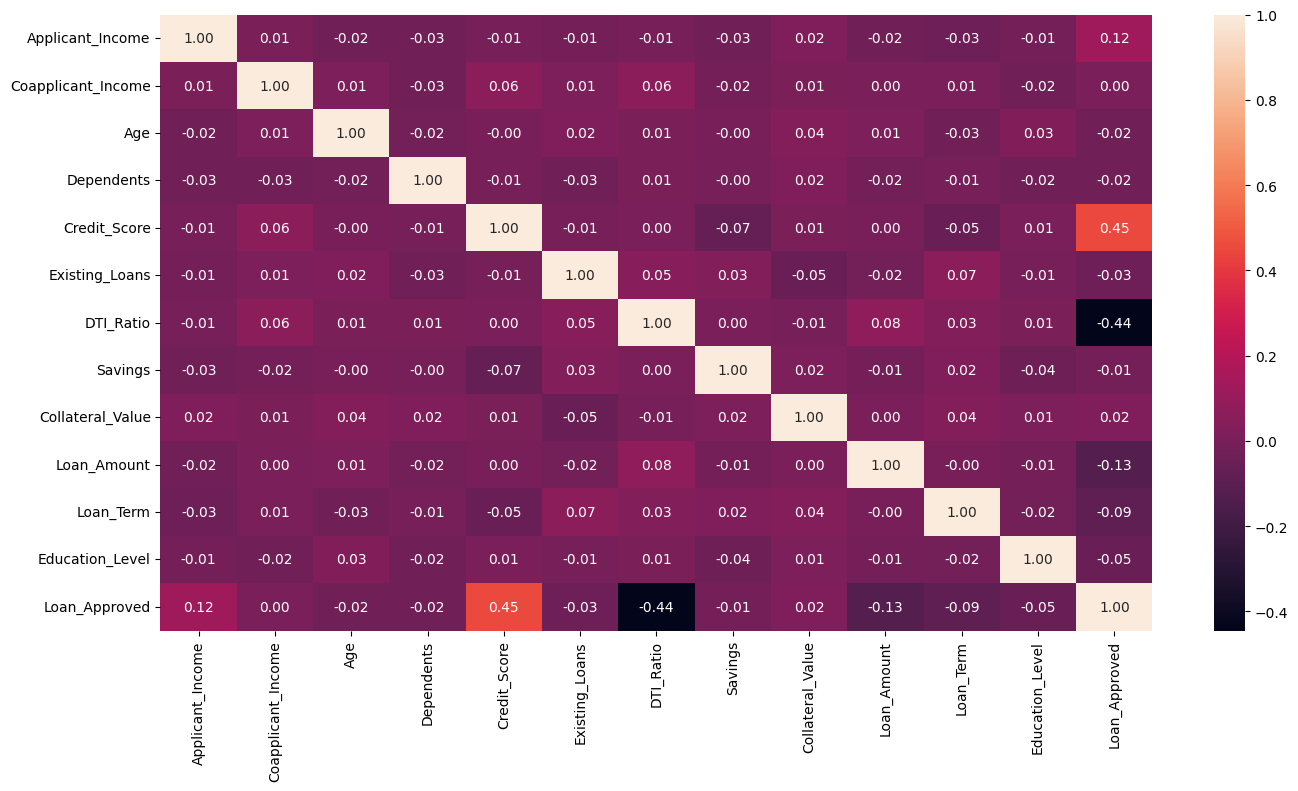

In [24]:
num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()

plt.figure(figsize=(16,8))
sns.heatmap(data=corr_matrix,
           annot=True,
           fmt=".2f")

# Train & Test Split

In [25]:
# Checking Data Balance or Imbalance
print(df['Loan_Approved'].value_counts())
print()
print(f"In Percentage Data \n{df['Loan_Approved'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'}")
# This is Imbalance Data 

Loan_Approved
0    702
1    298
Name: count, dtype: int64

In Percentage Data 
Loan_Approved
0    70.2%
1    29.8%
Name: proportion, dtype: object


In [26]:
from sklearn.model_selection import train_test_split

X = df_en.drop(columns='Loan_Approved',axis=1)
y = df_en['Loan_Approved']

X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 42,
    stratify=y
)

# Scaling DATA

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Trained Model & Evaluate

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

# Train Model
lr.fit(X_train_scaled,y_train)

# Predict Values
y_pred = lr.predict(X_test_scaled)

# Evaluate Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print()
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print()
print("Checking Logistic Regression Model for Overfitting or Underfitting")

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print(f"Training Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred)}")

Accuracy : 0.805
Precision : 0.647887323943662
Recall : 0.7666666666666667
F1 score : 0.7022900763358778

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       140
           1       0.65      0.77      0.70        60

    accuracy                           0.81       200
   macro avg       0.77      0.79      0.78       200
weighted avg       0.82      0.81      0.81       200

Confusion Matrix : 
[[115  25]
 [ 14  46]]

Checking Logistic Regression Model for Overfitting or Underfitting
Training Accuracy : 0.885
Testing Accuracy : 0.805


### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 42,
    stratify=y
)

dtc = DecisionTreeClassifier(max_depth=4, max_features='log2',random_state=45)

# Train Decision Tree Classifier
dtc.fit(X_train,y_train)

# Predict Values
y_pred = dtc.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print()
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print()

print("Checking Decision Tree CLassifier Model for Overfitting & Underfitting")

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(f"Training Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred)}")

Accuracy : 0.87
Precision : 0.7023809523809523
Recall : 0.9833333333333333
F1 score : 0.8194444444444444

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       140
           1       0.70      0.98      0.82        60

    accuracy                           0.87       200
   macro avg       0.85      0.90      0.86       200
weighted avg       0.90      0.87      0.87       200

Confusion Matrix : 
[[115  25]
 [  1  59]]

Checking Decision Tree CLassifier Model for Overfitting & Underfitting
Training Accuracy : 0.9125
Testing Accuracy : 0.87


### Support Vector Classifier

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC(kernel='rbf',random_state=42)

# Trian Support Vector Classifier
svc.fit(X_train_scaled, y_train)

# Predict Values
y_pred = svc.predict(X_test_scaled)

# Evaluate model
print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print()
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print()

print("Checking Support Vector Classifier Model for Overfitting or Underfitting")

y_train_pred = svc.predict(X_train_scaled)
y_test_pred = svc.predict(X_test_scaled)

print(f"Training Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred)}")

Accuracy :0.82
Precision : 0.6818181818181818
Recall : 0.75
F1 score : 0.7142857142857143

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       140
           1       0.68      0.75      0.71        60

    accuracy                           0.82       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.83      0.82      0.82       200

Confusion Matrix : 
[[119  21]
 [ 15  45]]

Checking Support Vector Classifier Model for Overfitting or Underfitting
Training Accuracy : 0.9575
Testing Accuracy : 0.82


### XGBoost

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50, max_depth=3,scale_pos_weight=702/298, learning_rate=2.0,max_leaves=5,random_state=42)

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

# Evaluate model
print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print()
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print()

print("Checking XGBoost Classifier Model for Overfitting or Underfitting")

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(f"Training Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred)}")

Accuracy :0.885
Precision : 0.7605633802816901
Recall : 0.9
F1 score : 0.8244274809160306

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       140
           1       0.76      0.90      0.82        60

    accuracy                           0.89       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.90      0.89      0.89       200

Confusion Matrix : 
[[123  17]
 [  6  54]]

Checking XGBoost Classifier Model for Overfitting or Underfitting
Training Accuracy : 0.99875
Testing Accuracy : 0.885


In [56]:
# Overall XGBoost Model Perform good.
# Their i use SMOTE technique to get better performance from imbalance data

# Using SMOTE for imbalance data
### for better performance

In [59]:
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

x_train_res,y_train_res = sm.fit_resample(X_train,y_train)

xgb.fit(x_train_res,y_train_res)

y_pred = xgb.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"Recall : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print()
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")

y_train_pred = xgb.predict(x_train_res)
y_test_pred = xgb.predict(X_test)
print(f"Training Acuracy : {accuracy_score(y_train_res,y_train_pred)}")
print(f"Testing Accuracy : {accuracy_score(y_test,y_test_pred)}")
print("Train F1:", f1_score(y_train_res, y_train_pred))
print("Test F1 :", f1_score(y_test, y_test_pred))

Accuracy : 0.895
Precision : 0.7671232876712328
Recall : 0.9333333333333333
F1 score : 0.8421052631578947

Confusion Matrix : 
[[123  17]
 [  4  56]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       140
           1       0.77      0.93      0.84        60

    accuracy                           0.90       200
   macro avg       0.87      0.91      0.88       200
weighted avg       0.91      0.90      0.90       200

Training Acuracy : 1.0
Testing Accuracy : 0.895
Train F1: 1.0
Test F1 : 0.8421052631578947
